## Handle and analyze climate model output (NAO, ENSO, ISM)

We’ll work with climate model output from a simulation called mil0021 (from Jungclaus et al. 2010).
Each .nc file you see there (NetCDF format) contains gridded world data for:

- Temperature at 2 m → TEMP2
- Pressure at sea level → MSLP
- Total precipitation → TPREC

for two seasons:
- DJF = December–January–February (winter)
- JJA = June–July–August (summer)

Study climate patterns (NAO, ENSO, Monsoon)

- xarray → opening the climate files
- matplotlib → drawing maps and charts
- cartopy → adding coastlines and map projections

In [1]:
!pip install xarray netCDF4 cartopy matplotlib numpy scipy

In [16]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

### Opening NetCDF files

In [3]:
# Opening One NetCDF file
ds = xr.open_dataset('mil0021_EH5_DJF_TEMP2.nc')

# what's inside
print(ds)

<xarray.Dataset> Size: 24MB
Dimensions:    (time: 1302, bnds: 2, lat: 48, lon: 96)
Coordinates:
  * time       (time) object 10kB 0800-02-15 06:00:00 ... 2100-12-31 18:00:00
  * lat        (lat) float32 192B 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
  * lon        (lon) float32 384B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 21kB ...
    2t         (time, lat, lon) float32 24MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Oct 31 10:14:13 2023: cdo -seasmean -selseas,DJF mil002...
    institution:  Max Planck Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


/opt/miniconda3/envs/bern03/lib/python3.11/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-1-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-1-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/6n/0ytpc3591y540__d6t0cmv_h0000gn/T/ipykernel_45658/1346507225.py:2: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset('mil0021_EH5_DJF_TEMP2.nc')


## Simple world map

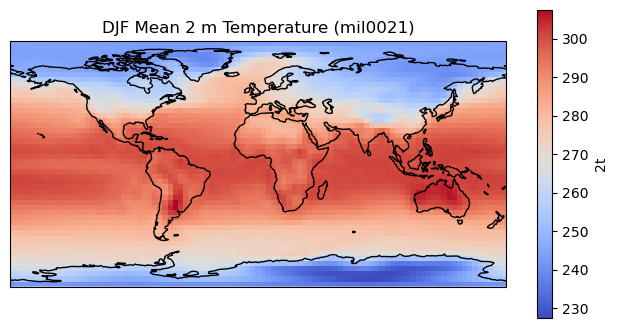

In [4]:
temp = ds['2t']   # 2-meter temperature
lon = ds['lon']
lat = ds['lat']

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
temp.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
ax.set_title('DJF Mean 2 m Temperature (mil0021)')
plt.show()

In [5]:
# open another file
ds = xr.open_dataset("mil0021_EH5_JJA_TEMP2.nc")

# see what’s inside
print(ds)

<xarray.Dataset> Size: 24MB
Dimensions:    (time: 1301, bnds: 2, lat: 48, lon: 96)
Coordinates:
  * time       (time) object 10kB 0800-07-31 18:00:00 ... 2100-07-31 18:00:00
  * lat        (lat) float32 192B 87.16 83.48 79.78 ... -79.78 -83.48 -87.16
  * lon        (lon) float32 384B 0.0 3.75 7.5 11.25 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 21kB ...
    2t         (time, lat, lon) float32 24MB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.9rc1 (https://mpimet.mpg...
    Conventions:  CF-1.6
    history:      Tue Oct 31 10:14:29 2023: cdo -seasmean -selseas,JJA mil002...
    institution:  Max Planck Institute for Meteorology
    CDO:          Climate Data Operators version 1.9.9rc1 (https://mpimet.mpg...


/opt/miniconda3/envs/bern03/lib/python3.11/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-1-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-1-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/6n/0ytpc3591y540__d6t0cmv_h0000gn/T/ipykernel_45658/1105798843.py:2: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset("mil0021_EH5_JJA_TEMP2.nc")


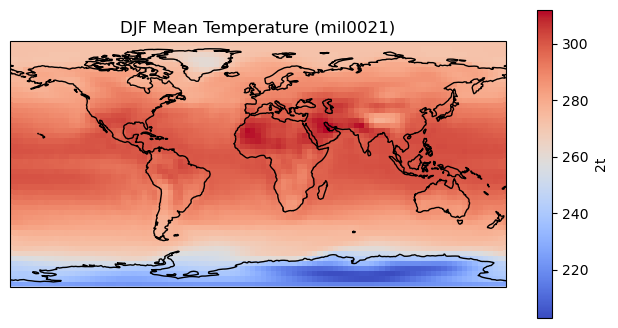

In [6]:
temp = ds["2t"].mean("time")   # average over time
lat = ds["lat"]
lon = ds["lon"]

plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())
temp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="coolwarm")
ax.coastlines()
ax.set_title("DJF Mean Temperature (mil0021)")
plt.show()

### Q3: North Atlantic Oscillation (NAO)

The NAO is a pressure difference between two points in the North Atlantic:
- Reykjavik, Iceland → (64.15 °N, −21.94 °E)
- Ponta Delgada, Azores → (37.74 °N, −25.68 °E)

When that difference changes, Europe’s weather changes too, so it’s one of the biggest patterns of climate variability.

- Open the DJF MSLP file (pressure).
- Get the pressure time-series at the two locations above.
- Subtract them to make a simple NAO index.
- Plot that index to see how it varies.

In [7]:
import sys
print(sys.executable)

/opt/miniconda3/envs/bern03/bin/python


In [8]:
import sys
!{sys.executable} -m pip install -U nc-time-axis==1.4.1 cftime

/opt/miniconda3/envs/bern03/lib/python3.11/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/6n/0ytpc3591y540__d6t0cmv_h0000gn/T/ipykernel_45658/1835474055.py:4: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds = xr.open_dataset("mil0021_EH5_DJF_MSLP.nc")


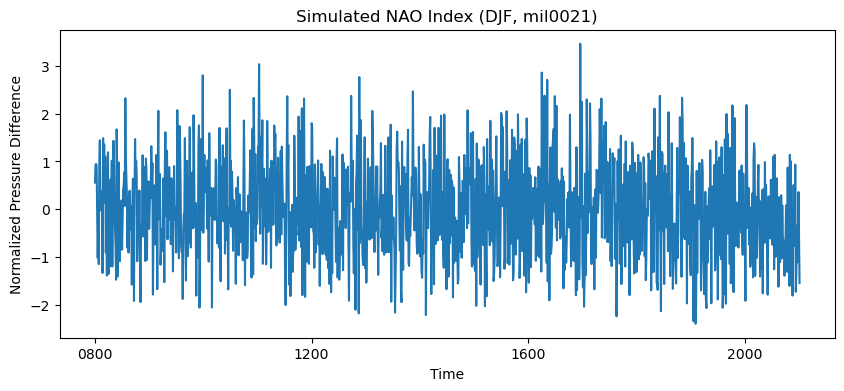

In [11]:
# conda install -c conda-forge nc-time-axis cftime -y  #installing extra helper nc-time-axis in conda terminal

# 1. open DJF mean-sea-level-pressure data
ds = xr.open_dataset("mil0021_EH5_DJF_MSLP.nc")
slp = ds["slp"]   # sea-level pressure variable
lon = ds["lon"]
lat = ds["lat"]

# 2. pick the two locations (nearest grid points)
reykjavik = slp.sel(lat=64.15, lon=-21.94, method="nearest")
azores     = slp.sel(lat=37.74, lon=-25.68, method="nearest")

# 3. compute pressure difference  (Reykjavik − Azores)
nao = reykjavik - azores

# 4. normalize it (to make units comparable)
nao = (nao - nao.mean("time")) / nao.std("time")

# 5. plot the NAO index
plt.figure(figsize=(10,4))
nao.plot()
plt.title("Simulated NAO Index (DJF, mil0021)")
plt.xlabel("Time")
plt.ylabel("Normalized Pressure Difference")
plt.show()


The simulated NAO index varies irregularly between positive and negative phases, showing no repeating pattern.
The fluctuations represent natural climate variability in the North Atlantic, with changes typically occurring every few years.
Positive phases correspond to stronger pressure differences between Iceland and the Azores, while negative phases indicate weaker differences.

The x-axis (Time)
- It shows years from about 800 to 2100 CE (because the model simulation runs for a very long period).


The y-axis (Normalized Pressure Difference)
- 0 = the long-term average.
- Positive values (above 0) → Iceland has higher pressure relative to the Azores → positive NAO phase.
- Negative values (below 0) → Iceland has lower pressure relative to the Azores → negative NAO phase.

- 	Positive NAO → stronger westerly winds → mild, wet winters in northern Europe and cold, dry conditions in Greenland.
- 	Negative NAO → weaker westerlies → colder European winters and warmer Greenland winters.

#### Challenge

dataset’s time is very old years (e.g., ~year 800). Pandas’ datetime can’t handle such old dates, so xarray uses cftime instead. To plot cftime times, matplotlib needs an extra helper package: nc-time-axis. Without it, I get:

ImportError: … requires the optional nc-time-axis package.


pip install "nc-time-axis>=1.2.0" "cftime>=1.6.4" (in terminal)



### Q4: NAO correlation maps

Making maps that show where the world co-varies with NAO index in DJF:
- 	NAO vs MSLP (pressure)
- 	NAO vs TEMP2 (2 m temperature)
-	NAO vs TPREC (precipitation)


/opt/miniconda3/envs/bern03/lib/python3.11/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-01-31 18:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0800-01-31 18:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  ref_date = _ensure_padded_year(ref_date)
/var/folders/6n/0ytpc3591y540__d6t0cmv_h0000gn/T/ipykernel_45658/3247591985.py:2: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates prior reform date (1582-10-15). To silence this warning specify 'use_cftime=True'.
  ds_m = xr.open_dataset("mil0021_EH5_DJF_MSLP.nc");  slp  = ds_m["slp"]
/opt/miniconda3/envs/bern03/lib/python3.11/site-packages/xarray/coding/times.py:213: SerializationWarning: Ambiguous reference date string: 800-1-31 18:00:0

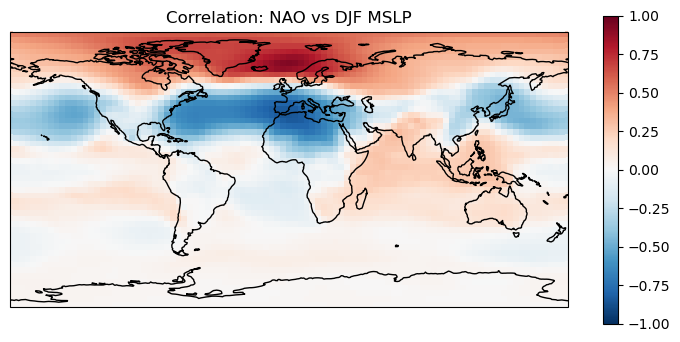

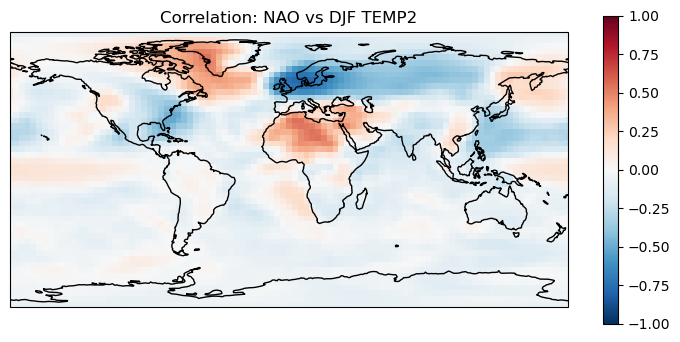

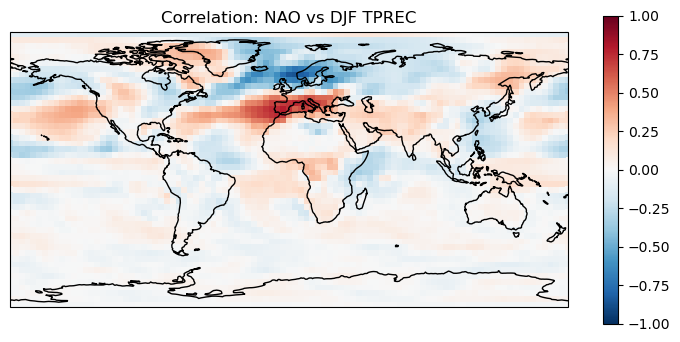

In [17]:
# --- load fields ---
ds_m = xr.open_dataset("mil0021_EH5_DJF_MSLP.nc");  slp  = ds_m["slp"]
ds_t = xr.open_dataset("mil0021_EH5_DJF_TEMP2.nc"); temp = ds_t["2t"]
ds_p = xr.open_dataset("mil0021_EH5_DJF_TPREC.nc"); prec = ds_p["precip"]

# --- NAO must be 1-D over time only ---
nao_1d = nao.reset_coords(drop=True).rename("NAO").astype("float64")

# --- make a common time axis (intersection to be extra safe) ---
common_time = np.intersect1d(slp["time"].values, nao_1d["time"].values)
slp  = slp.sel(time=common_time)
temp = temp.sel(time=common_time)
prec = prec.sel(time=common_time)
nao1 = nao_1d.sel(time=common_time)

# --- helper: correlation with a 1-D index over "time" ---
def corr_with_index(field, index, dim="time"):
    # anomalies
    fa = field - field.mean(dim)
    ia = index - index.mean(dim)
    # std
    fstd = fa.std(dim)
    istd = ia.std(dim)
    # r = cov / (std_f * std_i)
    r = (fa * ia).mean(dim) / (fstd * istd)
    return r

# --- maps ---
r_slp  = corr_with_index(slp,  nao1)
r_temp = corr_with_index(temp, nao1)
r_prec = corr_with_index(prec, nao1)

# --- plot helper ---
def plot_corr(r, title):
    plt.figure(figsize=(9,4))
    ax = plt.axes(projection=ccrs.PlateCarree())
    r.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="RdBu_r", vmin=-1, vmax=1)
    ax.coastlines()
    ax.set_title(title)
    plt.show()

plot_corr(r_slp,  "Correlation: NAO vs DJF MSLP")
plot_corr(r_temp, "Correlation: NAO vs DJF TEMP2")
plot_corr(r_prec, "Correlation: NAO vs DJF TPREC")

- 	MSLP: North Atlantic dipole (opposite signs near Iceland vs Azores) — that’s the NAO fingerprint.
-	TEMP2: positive NAO → warmer N. Europe/Scandinavia, cooler Greenland/NW Atlantic.
-	TPREC: positive NAO → wetter N. Europe/UK, drier Mediterranean.
